In [45]:
import gym
env = gym.make('CartPole-v1')
env.reset()
for step_index in range(4):
    env.render()
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    print("Step {}:".format(step_index))
    print("action: {}".format(action))
    print("observation: {}".format(observation))
    print("reward: {}".format(reward))
    print("done: {}".format(done))
    print("info: {}".format(info))
    if done:
        break


Step 0:
action: 0
observation: [-0.00191059 -0.16546262  0.00939264  0.32624757]
reward: 1.0
done: False
info: {}
Step 1:
action: 1
observation: [-0.00521984  0.02952435  0.01591759  0.03654141]
reward: 1.0
done: False
info: {}
Step 2:
action: 0
observation: [-0.00462935 -0.1658222   0.01664842  0.33420369]
reward: 1.0
done: False
info: {}
Step 3:
action: 1
observation: [-0.0079458   0.02905889  0.02333249  0.04681697]
reward: 1.0
done: False
info: {}


In [46]:
env.close()

## logic starts here :

In [1]:
import gym
import random
import numpy as np
from keras.models     import Sequential
from keras.layers     import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [33]:
from tensorflow.keras.callbacks import TensorBoard
from time import time
tensor = TensorBoard(log_dir="logs/final/{}".format(time()))

In [3]:
env = gym.make('CartPole-v1')
env.reset()
goal_steps = 500
score_requirement = 60
intial_games = 10000

In [4]:
def model_data_preparation():
    training_data = []
    accepted_scores = []
    for game_index in range(intial_games):
        score = 0
        game_memory = []
        previous_observation = []
        for step_index in range(goal_steps):
            action = random.randrange(0, 2)
            observation, reward, done, info = env.step(action)
            
            if len(previous_observation) > 0:
                game_memory.append([previous_observation, action])
                
            previous_observation = observation
            score += reward
            if done:
                break
            
        if score >= score_requirement:
            accepted_scores.append(score)
            for data in game_memory:
                if data[1] == 1:
                    output = [0, 1]
                elif data[1] == 0:
                    output = [1, 0]
                training_data.append([data[0], output])
        
        env.reset()

    print(accepted_scores)
    
    return training_data

In [5]:
training_data = model_data_preparation()

[76.0, 63.0, 71.0, 71.0, 66.0, 62.0, 68.0, 63.0, 67.0, 68.0, 68.0, 73.0, 81.0, 81.0, 60.0, 61.0, 61.0, 61.0, 77.0, 66.0, 66.0, 61.0, 62.0, 62.0, 86.0, 60.0, 88.0, 84.0, 66.0, 67.0, 94.0, 66.0, 63.0, 66.0, 76.0, 83.0, 79.0, 90.0, 63.0, 85.0, 75.0, 83.0, 60.0, 74.0, 63.0, 66.0, 75.0, 71.0, 92.0, 85.0, 60.0, 75.0, 60.0, 60.0, 61.0, 109.0, 67.0, 86.0, 71.0, 62.0, 62.0, 75.0, 89.0, 60.0, 64.0, 72.0, 63.0, 62.0, 61.0, 88.0, 61.0, 60.0, 67.0, 78.0, 75.0, 76.0, 80.0, 65.0, 60.0, 84.0, 123.0, 60.0, 81.0, 81.0, 78.0, 66.0, 76.0, 66.0, 70.0, 61.0, 66.0, 68.0, 68.0, 66.0, 64.0, 78.0, 77.0, 68.0, 60.0, 60.0, 66.0, 62.0, 65.0, 101.0, 77.0, 60.0, 60.0, 73.0, 82.0, 72.0, 84.0, 64.0, 91.0, 102.0, 60.0, 72.0, 68.0, 80.0, 90.0, 72.0, 69.0, 92.0, 65.0, 61.0, 78.0, 63.0, 124.0, 76.0, 73.0, 88.0, 65.0, 62.0, 62.0, 69.0, 75.0, 61.0, 85.0, 61.0, 62.0, 85.0, 77.0, 77.0, 69.0, 86.0, 69.0, 62.0, 94.0, 68.0, 60.0, 69.0, 82.0, 61.0, 61.0, 60.0]


In [6]:
def build_model(input_size, output_size):
    model = Sequential()
    model.add(Dense(128, input_dim=input_size, activation='relu'))
    model.add(Dense(52, activation='relu'))
    model.add(Dense(output_size, activation='linear'))
    model.compile(loss='mse', optimizer=Adam(), metrics=['accuracy'])
    return model

In [34]:
def train_model(training_data):
    X = np.array([i[0] for i in training_data]).reshape(-1, len(training_data[0][0]))
    y = np.array([i[1] for i in training_data]).reshape(-1, len(training_data[0][1]))
    model = build_model(input_size=len(X[0]), output_size=len(y[0]))
    
    hist = model.fit(X, y,epochs=10, 
                  shuffle=True,  
                 # batch_size=32,
                  validation_split=0.20,
                    callbacks=[tensor])
    return hist, model

In [37]:
history ,trained_model= train_model(training_data)

Train on 8754 samples, validate on 2189 samples
Epoch 1/10
8754/8754 [==============================] - 1s 99us/step - loss: 0.2482 - acc: 0.6028 - val_loss: 0.2363 - val_acc: 0.6039
Epoch 2/10
8754/8754 [==============================] - 0s 40us/step - loss: 0.2348 - acc: 0.6105 - val_loss: 0.2354 - val_acc: 0.6080
Epoch 3/10
8754/8754 [==============================] - 0s 45us/step - loss: 0.2343 - acc: 0.6065 - val_loss: 0.2338 - val_acc: 0.6080
Epoch 4/10
8754/8754 [==============================] - 0s 44us/step - loss: 0.2337 - acc: 0.6113 - val_loss: 0.2339 - val_acc: 0.6094
Epoch 5/10
8754/8754 [==============================] - 0s 48us/step - loss: 0.2329 - acc: 0.6091 - val_loss: 0.2329 - val_acc: 0.6085
Epoch 6/10
8754/8754 [==============================] - 0s 55us/step - loss: 0.2325 - acc: 0.6111 - val_loss: 0.2353 - val_acc: 0.6039
Epoch 7/10
8754/8754 [==============================] - 0s 56us/step - loss: 0.2321 - acc: 0.6129 - val_loss: 0.2334 - val_acc: 0.6131
Epoch 8

In [24]:
scores = []
choices = []
for each_game in range(10):
    score = 0
    prev_obs = []
    for step_index in range(goal_steps):
        env.render()
        if len(prev_obs)==0:
            action = random.randrange(0,2)
        else:
            action = np.argmax(trained_model.predict(prev_obs.reshape(-1, len(prev_obs)))[0])
        
        choices.append(action)
        new_observation, reward, done, info = env.step(action)
        prev_obs = new_observation
        score+=reward
        if done:
            break

    env.reset()
    scores.append(score)

print(scores)
print('Average Score:', sum(scores)/len(scores))
print('choice 1:{}  choice 0:{}'.format(choices.count(1)/len(choices),choices.count(0)/len(choices)))


[232.0, 144.0, 195.0, 300.0, 407.0, 333.0, 135.0, 279.0, 142.0, 136.0]
Average Score: 230.3
choice 1:0.5054277029960921  choice 0:0.4945722970039079


In [25]:
env.close()

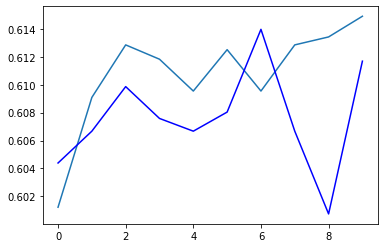

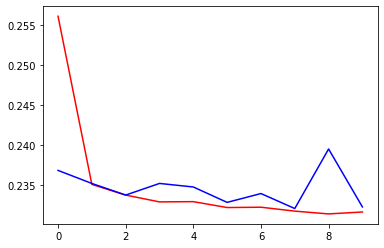

In [26]:

plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'], color = 'b')

plt.figure(2)
plt.plot(history.history['loss'], color = 'r')
plt.plot(history.history['val_loss'], color = 'b')

## retry

In [38]:
def train_model2(training_data):
    X = np.array([i[0] for i in training_data]).reshape(-1, len(training_data[0][0]))
    y = np.array([i[1] for i in training_data]).reshape(-1, len(training_data[0][1]))
    model = build_model(input_size=len(X[0]), output_size=len(y[0]))
    
    model.fit(X, y, epochs=10)
    return model

In [43]:
trained_model = train_model2(training_data)

Epoch 1/10
10943/10943 [==============================] - 1s 79us/step - loss: 0.2448 - acc: 0.6080
Epoch 2/10
10943/10943 [==============================] - 0s 38us/step - loss: 0.2340 - acc: 0.6092
Epoch 3/10
10943/10943 [==============================] - 0s 42us/step - loss: 0.2336 - acc: 0.6122
Epoch 4/10
10943/10943 [==============================] - 0s 39us/step - loss: 0.2328 - acc: 0.6135
Epoch 5/10
10943/10943 [==============================] - 0s 38us/step - loss: 0.2328 - acc: 0.6121
Epoch 6/10
10943/10943 [==============================] - 1s 47us/step - loss: 0.2323 - acc: 0.6102
Epoch 7/10
10943/10943 [==============================] - 0s 38us/step - loss: 0.2322 - acc: 0.6113
Epoch 8/10
10943/10943 [==============================] - 1s 53us/step - loss: 0.2317 - acc: 0.6134
Epoch 9/10
10943/10943 [==============================] - 1s 46us/step - loss: 0.2318 - acc: 0.6119
Epoch 10/10
10943/10943 [==============================] - 0s 39us/step - loss: 0.2317 - acc: 0.6118

In [44]:
scores = []
choices = []
for each_game in range(100):
    score = 0
    prev_obs = []
    for step_index in range(goal_steps):
        env.render()
        if len(prev_obs)==0:
            action = random.randrange(0,2)
        else:
            action = np.argmax(trained_model.predict(prev_obs.reshape(-1, len(prev_obs)))[0])
        
        choices.append(action)
        new_observation, reward, done, info = env.step(action)
        prev_obs = new_observation
        score+=reward
        if done:
            break

    env.reset()
    scores.append(score)

print(scores)
print('Average Score:', sum(scores)/len(scores))
print('choice 1:{}  choice 0:{}'.format(choices.count(1)/len(choices),choices.count(0)/len(choices)))

[214.0, 309.0, 240.0, 495.0, 500.0, 276.0, 129.0, 500.0, 150.0, 277.0, 388.0, 137.0, 165.0, 145.0, 185.0, 210.0, 144.0, 390.0, 176.0, 132.0, 358.0, 142.0, 293.0, 188.0, 150.0, 150.0, 379.0, 229.0, 264.0, 152.0, 160.0, 172.0, 422.0, 182.0, 268.0, 216.0, 162.0, 168.0, 197.0, 146.0, 250.0, 206.0, 360.0, 432.0, 286.0, 158.0, 209.0, 186.0, 216.0, 346.0, 168.0, 183.0, 175.0, 183.0, 496.0, 213.0, 266.0, 141.0, 183.0, 233.0, 172.0, 245.0, 162.0, 212.0, 290.0, 248.0, 250.0, 216.0, 148.0, 214.0, 271.0, 136.0, 224.0, 212.0, 198.0, 188.0, 296.0, 166.0, 194.0, 168.0, 136.0, 254.0, 500.0, 198.0, 159.0, 346.0, 256.0, 176.0, 220.0, 188.0, 300.0, 168.0, 252.0, 153.0, 161.0, 137.0, 247.0, 146.0, 140.0, 280.0]
Average Score: 230.77
choice 1:0.49295835680547734  choice 0:0.5070416431945227
